In [1]:
from skimage import *
import numpy as np
import h5py 
from matplotlib import pyplot as plt
import seaborn as sns

# Load the result data

In [2]:
training_result = "/home/wentao/project/keras_training/UNet2D1D_SSIM_loss_no_regularization/20190818-171741/predictions/result.h5"

In [3]:
f = h5py.File(training_result,'r') 
result = np.array(f.get('result'))
truth = np.array(f.get('truth'))
imag = np.array(f.get('input'))

## Calculate the metrics

In [4]:
psnr = []
mse = []
nrmse = []
ssim = []
for i in range(0, truth.shape[0]):
    psnr.append(measure.compare_psnr(result[i],truth[i], 1))
    mse.append(measure.compare_mse(result[i], truth[i]))
    nrmse.append(measure.compare_nrmse(result[i], truth[i]))
    ssim.append(measure.compare_ssim(result[i], truth[i], data_range=1))

# find the best and the worst images by ssim value  
best_image_index = ssim.index(max(ssim))
worst_image_index = ssim.index(min(ssim))

## average mse, nrmse psnr, ssim values

In [5]:
print(np.mean(mse), np.mean(nrmse), np.mean(psnr), np.mean(ssim))

0.0025223640651640873 0.21133017439700152 26.821614944134954 0.8385503259409074


## best image by ssim value

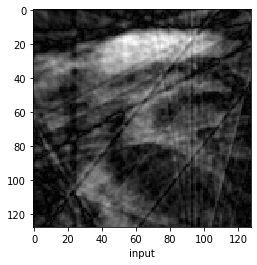

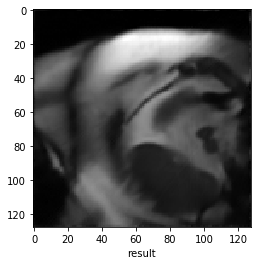

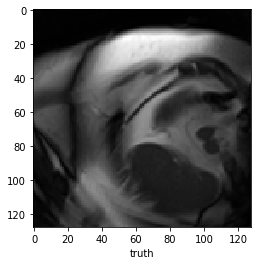

In [6]:
plt.figure(1)
plt.imshow(imag[best_image_index, :, :, 0], cmap='gray')
plt.xlabel('input')
plt.savefig('./images/UNet2D1D_SSIM_loss_no_regularization_best_input.jpg')
plt.figure(2)
plt.imshow(result[best_image_index, :, :, 0], cmap='gray')
plt.xlabel('result')
plt.savefig('./images/UNet2D1D_SSIM_loss_no_regularization_best_result.jpg')
plt.figure(3)
plt.imshow(truth[best_image_index, :, :, 0], cmap='gray')
plt.xlabel('truth')
plt.savefig('./images/UNet2D1D_SSIM_loss_no_regularization_best_truth.jpg')

## ssim value of the best image

In [7]:
ssim[best_image_index]

0.9387480976242589

## worst image by ssim value

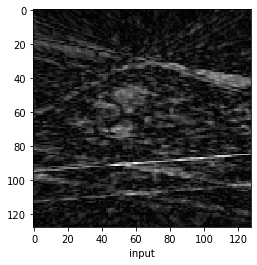

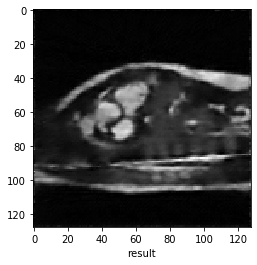

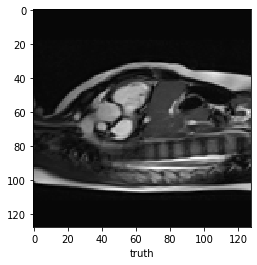

In [8]:
plt.figure(1)
plt.imshow(imag[worst_image_index, :, :, 0], cmap='gray')
plt.xlabel('input')
plt.savefig('./images/UNet2D1D_SSIM_loss_no_regularization_worst_input.jpg')
plt.figure(2)
plt.imshow(result[worst_image_index, :, :, 0], cmap='gray')
plt.xlabel('result')
plt.savefig('./images/UNet2D1D_SSIM_loss_no_regularization_worst_result.jpg')
plt.figure(3)
plt.imshow(truth[worst_image_index, :, :, 0], cmap='gray')
plt.xlabel('truth')
plt.savefig('./images/UNet2D1D_SSIM_loss_no_regularization_worst_truth.jpg')

## ssim value of the worst image

In [9]:
ssim[worst_image_index]

0.6470876433887812

# Historgrams

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  1.,  0.,  1.,  1.,  2.,
         1.,  1.,  3.,  2.,  5.,  4.,  4.,  6.,  5.,  8.,  6., 15., 19.,
        18., 16., 15., 16., 18., 21., 28., 42., 32., 28., 27., 20., 27.,
        24., 12., 16., 15., 16.,  4.,  8.,  2.,  3.,  2.,  1.]),
 array([0.64708764, 0.65292085, 0.65875406, 0.66458727, 0.67042048,
        0.67625369, 0.6820869 , 0.68792011, 0.69375332, 0.69958653,
        0.70541973, 0.71125294, 0.71708615, 0.72291936, 0.72875257,
        0.73458578, 0.74041899, 0.7462522 , 0.75208541, 0.75791862,
        0.76375183, 0.76958503, 0.77541824, 0.78125145, 0.78708466,
        0.79291787, 0.79875108, 0.80458429, 0.8104175 , 0.81625071,
        0.82208392, 0.82791713, 0.83375033, 0.83958354, 0.84541675,
        0.85124996, 0.85708317, 0.86291638, 0.86874959, 0.8745828 ,
        0.88041601, 0.88624922, 0.89208242, 0.89791563, 0.90374884,
        0.90958205, 0.91541526, 0.92124847, 0.92708168, 0.93291489,
        0.9387481 ]),
 <a list of 50

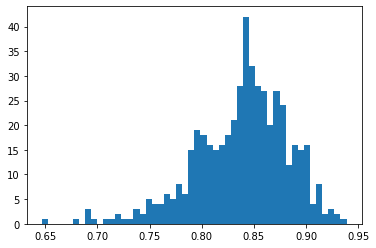

In [14]:
plt.hist(ssim, bins=50)

(array([ 9., 39., 68., 77., 48., 48., 38., 23., 20., 16., 18.,  7., 13.,
         8.,  6.,  6.,  7., 10.,  7.,  3.,  5.,  3.,  2.,  2.,  1.,  2.,
         1.,  2.,  3.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00050354, 0.00077558, 0.00104762, 0.00131966, 0.0015917 ,
        0.00186373, 0.00213577, 0.00240781, 0.00267985, 0.00295189,
        0.00322393, 0.00349596, 0.003768  , 0.00404004, 0.00431208,
        0.00458412, 0.00485615, 0.00512819, 0.00540023, 0.00567227,
        0.00594431, 0.00621634, 0.00648838, 0.00676042, 0.00703246,
        0.0073045 , 0.00757654, 0.00784857, 0.00812061, 0.00839265,
        0.00866469, 0.00893673, 0.00920876, 0.0094808 , 0.00975284,
        0.01002488, 0.01029692, 0.01056895, 0.01084099, 0.01111303,
        0.01138507, 0.01165711, 0.01192915, 0.01220118, 0.01247322,
        0.01274526, 0.0130173 , 0.01328934, 0.01356137, 0.01383341,
        0.01410545]),
 <a list of 50

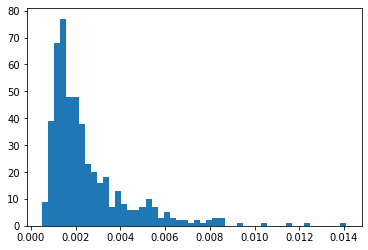

In [16]:
plt.hist(mse, bins=50)

(array([ 2., 15., 19., 34., 60., 56., 61., 45., 32., 34., 21., 21., 14.,
         5.,  8.,  8.,  9.,  4.,  7.,  4.,  3.,  6.,  4.,  4.,  4.,  2.,
         1.,  7.,  1.,  1.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.08759799, 0.1011683 , 0.11473861, 0.12830892, 0.14187924,
        0.15544955, 0.16901986, 0.18259018, 0.19616049, 0.2097308 ,
        0.22330112, 0.23687143, 0.25044174, 0.26401206, 0.27758237,
        0.29115268, 0.304723  , 0.31829331, 0.33186362, 0.34543393,
        0.35900425, 0.37257456, 0.38614487, 0.39971519, 0.4132855 ,
        0.42685581, 0.44042613, 0.45399644, 0.46756675, 0.48113707,
        0.49470738, 0.50827769, 0.521848  , 0.53541832, 0.54898863,
        0.56255894, 0.57612926, 0.58969957, 0.60326988, 0.6168402 ,
        0.63041051, 0.64398082, 0.65755114, 0.67112145, 0.68469176,
        0.69826207, 0.71183239, 0.7254027 , 0.73897301, 0.75254333,
        0.76611364]),
 <a list of 50

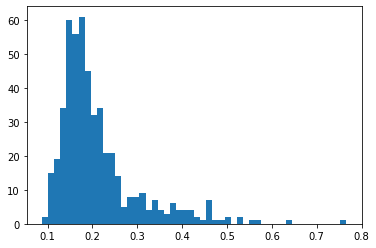

In [17]:
plt.hist(nrmse, bins=50)

(array([ 1.,  0.,  2.,  0.,  1.,  0.,  1.,  5.,  3.,  3.,  3.,  3.,  7.,
         5., 11., 11.,  6.,  8.,  9., 13.,  7., 14., 13.,  9., 16., 15.,
        12., 23., 25., 25., 19., 26., 17., 29., 26., 27., 24., 17., 16.,
        12., 10.,  8.,  7.,  4.,  1.,  0.,  3.,  1.,  1.,  1.]),
 array([18.50613049, 18.79560033, 19.08507017, 19.37454001, 19.66400984,
        19.95347968, 20.24294952, 20.53241935, 20.82188919, 21.11135903,
        21.40082887, 21.6902987 , 21.97976854, 22.26923838, 22.55870821,
        22.84817805, 23.13764789, 23.42711772, 23.71658756, 24.0060574 ,
        24.29552724, 24.58499707, 24.87446691, 25.16393675, 25.45340658,
        25.74287642, 26.03234626, 26.3218161 , 26.61128593, 26.90075577,
        27.19022561, 27.47969544, 27.76916528, 28.05863512, 28.34810495,
        28.63757479, 28.92704463, 29.21651447, 29.5059843 , 29.79545414,
        30.08492398, 30.37439381, 30.66386365, 30.95333349, 31.24280333,
        31.53227316, 31.821743  , 32.11121284, 32.40068267,

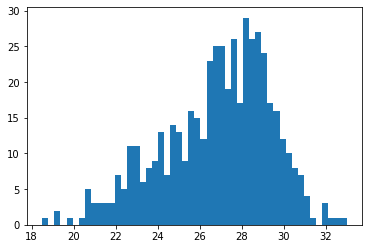

In [18]:
plt.hist(psnr, bins=50)